In [3]:
import dask.dataframe as dd

df = dd.read_csv('*.csv')

In [4]:
ls

Big-Data-Sprint-Notebook.ipynb  Youtube03-LMFAO.csv
lost+found/                     Youtube04-Eminem.csv
__MACOSX/                       Youtube05-Shakira.csv
Youtube01-Psy.csv               YouTube-Spam-Collection-v1.zip
Youtube02-KatyPerry.csv


In [5]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [6]:
df.shape

(Delayed('int-f734a2a7-7bea-444b-b170-80de713707e2'), 5)

In [7]:
len(df)

1956

In [8]:
df['CONTENT'] = df['CONTENT'].str.lower()

In [9]:
spam = df[(df.CLASS != 0) & (df.CLASS == 1)]

In [10]:
len(spam)

1005

In [11]:
ham = df[(df.CLASS != 1) & (df.CLASS == 0)]

In [12]:
len(ham)

951

In [13]:
check = df[(df.CONTENT.astype(str).str.contains("check"))]

In [14]:
check.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,hey guys check out my new channel and our firs...,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtarggvgtwq check this out .﻿,1
5,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"hey, check out my new website!! this site is a...",1
7,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...,0


In [15]:
spam_check = spam[(spam.CONTENT.astype(str).str.contains("check"))]

In [16]:
len(spam_check)

461

In [17]:
ham_check = ham[(ham.CONTENT.astype(str).str.contains("check"))]

In [18]:
len(ham_check)

19

In [25]:
!pip install graphviz

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


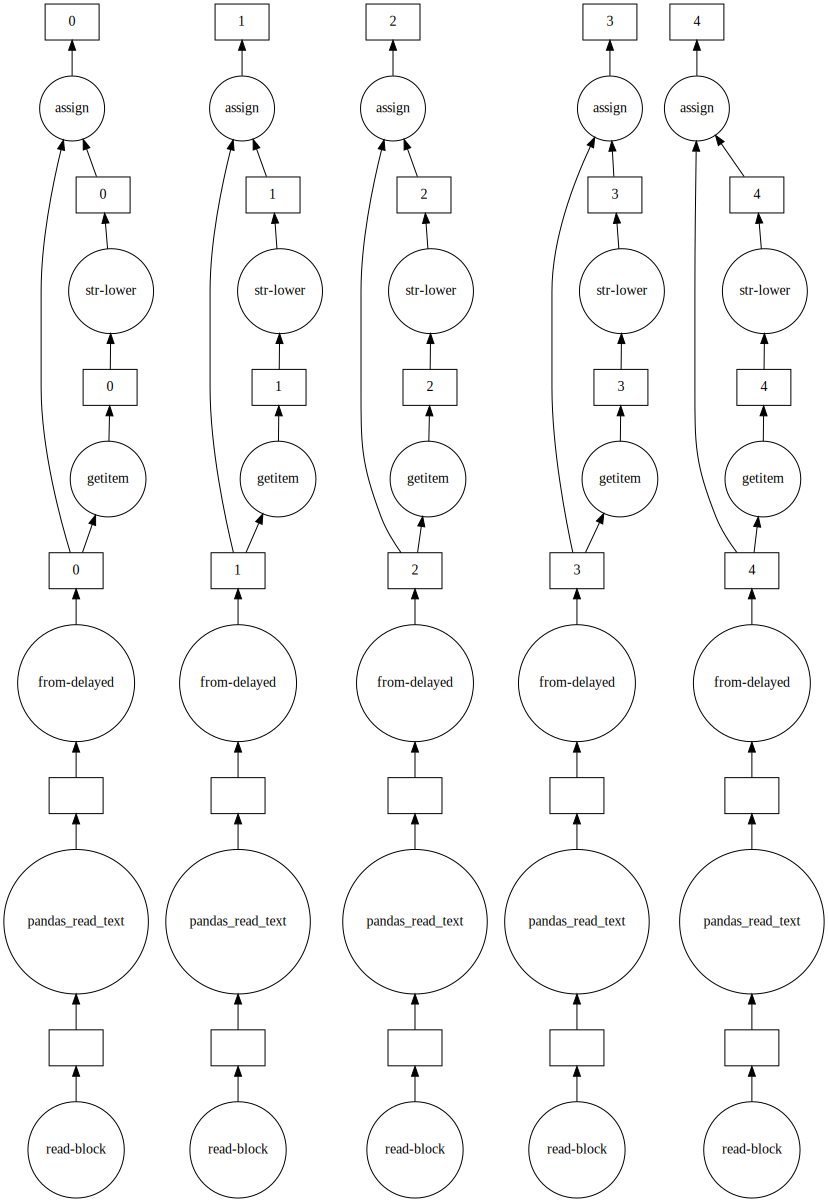

In [26]:
df.visualize(filename='visualization.svg')

A source of confusion for me at the beginning of the week was the difference between Amazon Sagemaker and Amazon EMR. The difference is that EMR is a cluster system with a notebook interface and SageMaker is not dependent on clusters from the outset. Where Amazon describes EMR as a "cluster platform" it describes SageMaker as a "fully-managed platform".

I prefer Databricks to EMR for its comparative ease of use. Where one can choose from many different cluster types in EMR, the only instance types available in Databricks are high CPU or high memory.

This preference is not immutable and I imagine, if I were working on a very complicated machine learning project, I'd prefer the greater degree of control afforded by Sagemaker (better, I understand, for machine learning than EMR).

I would not use Sagemaker or EMR if I found myself working on a rather simpler project—for example, if I were just interested in exploring some large dataframe, I would choose Databricks and explore either in Apache Spark with a Python or Scala API. 